In [42]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader,Dataset
import os
import sys
import numpy
import librosa
import pandas as pd
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
import torch

In [43]:
'''audio_path = 'train/'
students_num = ["029", "033", "039", "045", "049", "068", "914", "918", "919", "934", "970"]
orders_num = ["Takeoff", "Landing", "Advance", "Retreat", "Rise"]
repeat_num = ['1', '2', '3', '4']
number_of_mfcc_features = 13
orders_dic = {
    'Takeoff': 0,
    'Landing': 1,
    'Advance': 2,
    'Retreat': 3,
    'Rise': 4
}
'''
batch_size = 64

In [44]:

my_path = 'audio_speech_actors_01-24/'


emotions_num = ["Neutral-01","Calm-02","Happy-03","Sad-04","Angry-05","Fearful-06","Disgust-07","Surprised-08"]
actors = ["01","02","03","04","05","06","07","08","09","10","11","12",
         "13","14","15","16","17","18","19","20","21","22","23","24"]

orders_dic = {
    'Neutral': 0,
    'Calm': 1,
    'Happy': 2,
    'Sad': 3,
    'Angry': 4,
    'Fearful':5,
    'Disgust':6,
    'Surprised':7
}
def mfcc_extraction(path, modal_vocal, emotions_num, actors):
    labels = []
    mfcc_features = []
    
    #with repetition number: 1 and statement number 1 and emotional intensity number #1
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            sig, rate = librosa.load(path+modal_vocal+emotion_num[-2:]+"-01-01-01-"+actor+".wav", sr=16000)
            mfcc_feat = librosa.feature.mfcc(y=sig,sr=rate,n_mfcc=13).T
            mfcc_features.append(mfcc_feat)
            
            labels.append(emotion_num[:-3])
    
    #with repetition number: 1 and statement number 2 and emotional intensity number 1
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            sig, rate = librosa.load(path+modal_vocal+emotion_num[-2:]+"-01-02-01-"+actor+".wav", sr=16000)
            mfcc_feat = librosa.feature.mfcc(y=sig,sr=rate,n_mfcc=13).T
            mfcc_features.append(mfcc_feat)
            
            labels.append(emotion_num[:-3])
            
    #with repetition number: 2 and statement number 1 and emotional intensity number #1
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            sig, rate = librosa.load(path+modal_vocal+emotion_num[-2:]+"-01-01-02-"+actor+".wav", sr=16000)
            mfcc_feat = librosa.feature.mfcc(y=sig,sr=rate,n_mfcc=13).T
            mfcc_features.append(mfcc_feat)
            
            labels.append(emotion_num[:-3])
            
    #with repetition number: 2 and statement number 2 and emotional intensity number 1
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            sig, rate = librosa.load(path+modal_vocal+emotion_num[-2:]+"-01-02-02-"+actor+".wav", sr=16000)
            mfcc_feat = librosa.feature.mfcc(y=sig,sr=rate,n_mfcc=13).T
            mfcc_features.append(mfcc_feat)
            
            labels.append(emotion_num[:-3])
    
    #with repetition number: 1 and statement number 1 and emotional intensity number #2
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            if emotion_num != "Neutral-01":
                sig, rate = librosa.load(path+modal_vocal+emotion_num[-2:]+"-02-01-01-"+actor+".wav", sr=16000)
                mfcc_feat = librosa.feature.mfcc(y=sig,sr=rate,n_mfcc=13).T
                mfcc_features.append(mfcc_feat)
                
                labels.append(emotion_num[:-3])
    
    #with repetition number: 1 and statement number 2 and emotional intensity number 2
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            if emotion_num != "Neutral-01":
                sig, rate = librosa.load(path+modal_vocal+emotion_num[-2:]+"-02-02-01-"+actor+".wav", sr=16000)
                mfcc_feat = librosa.feature.mfcc(y=sig,sr=rate,n_mfcc=13).T
                mfcc_features.append(mfcc_feat)
                
                labels.append(emotion_num[:-3])
            
    #with repetition number: 2 and statement number 1 and emotional intensity number #2
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            if emotion_num != "Neutral-01":
                sig, rate = librosa.load(path+modal_vocal+emotion_num[-2:]+"-02-01-02-"+actor+".wav", sr=16000)
                mfcc_feat = librosa.feature.mfcc(y=sig,sr=rate,n_mfcc=13).T
                mfcc_features.append(mfcc_feat)
                
                labels.append(emotion_num[:-3])
            
    #with repetition number: 2 and statement number 2 and emotional intensity number 2
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            if emotion_num != "Neutral-01":
                sig, rate = librosa.load(path+modal_vocal+emotion_num[-2:]+"-02-02-02-"+actor+".wav", sr=16000)
                mfcc_feat = librosa.feature.mfcc(y=sig,sr=rate,n_mfcc=13).T
                mfcc_features.append(mfcc_feat)
                
                labels.append(emotion_num[:-3])      

    return mfcc_features, labels


mfcc_features_and_labels = mfcc_extraction(my_path,'/03-01-', emotions_num, actors)

In [45]:
mfcc_features, mfcc_labels = mfcc_features_and_labels
mfcc_labels = np.array(mfcc_labels)
print("feature shape:", mfcc_features[1].shape)
def zero_pad(features):
    
    new_spoken_train = []
    max_shape = 0
    for x in features:
        all_shapes = x.shape[0]
        if all_shapes > max_shape:
            max_shape = all_shapes

    for x in features:
        difference = max_shape-x.shape[0]
        zero_padded = np.pad(x,((0,difference),(0,0)), "constant")
        new_spoken_train.append(zero_padded)

    new_spoken_train = np.array(new_spoken_train)
    
    return new_spoken_train

mfcc_features = zero_pad(mfcc_features)
print(mfcc_features.shape)

#mfcc_labels = np.array(mfcc_labels)

feature shape: (114, 13)
(1440, 165, 13)


In [46]:
print(mfcc_labels)
print(np.array(mfcc_labels))
print(np.array(mfcc_labels).shape)
print(np.array(mfcc_features).shape)

['Neutral' 'Neutral' 'Neutral' ... 'Surprised' 'Surprised' 'Surprised']
['Neutral' 'Neutral' 'Neutral' ... 'Surprised' 'Surprised' 'Surprised']
(1440,)
(1440, 165, 13)


# 数据标准化

In [47]:
flatten_mfcc_features = np.reshape(mfcc_features,(mfcc_features.shape[0],165 * 13))
print(flatten_mfcc_features.shape)
from sklearn.preprocessing import StandardScaler

data = flatten_mfcc_features
scaler = StandardScaler()
mfcc_features = scaler.fit_transform(data)

new_mfcc_features = np.reshape(mfcc_features,(mfcc_features.shape[0],165, 13))
print(new_mfcc_features[0])

(1440, 2145)
[[-0.9971336  -0.4177642  -0.35333753 ... -0.45470217 -0.53917575
  -0.49893758]
 [-1.0171968  -0.47464985 -0.33580223 ... -0.48737705 -0.5975461
  -0.5192523 ]
 [-1.0171915  -0.49410033 -0.31271464 ... -0.49532905 -0.59101653
  -0.5018856 ]
 ...
 [ 0.02636147 -0.02636147  0.02636147 ... -0.02636147  0.02636147
   0.02636147]
 [ 0.02636147 -0.02636147  0.02636147 ... -0.02636147  0.02636147
   0.02636147]
 [ 0.02636147 -0.02636147  0.02636147 ... -0.02636147  0.02636147
   0.02636147]]


# 划分训练集、测试集

In [48]:
#LabelEncode
from sklearn.model_selection import train_test_split
mfcc_labels = [orders_dic[label] for label in mfcc_labels]
X_train, X_test, y_train, y_test = train_test_split(new_mfcc_features, mfcc_labels, test_size=0.30, 
                                                    random_state=42, stratify = mfcc_labels, shuffle= True)


In [49]:
'''mfcc_labels = torch.from_numpy(np.array(mfcc_labels))
mfcc_features = torch.from_numpy(np.array(mfcc_features))'''
'''print(y_train)
print(len(X_train))
print(X_train)'''


'''print(mfcc_labels)
print(type(mfcc_labels))
print(mfcc_features)
print(mfcc_labels.shape)
print(mfcc_features.shape)'''

'print(mfcc_labels)\nprint(type(mfcc_labels))\nprint(mfcc_features)\nprint(mfcc_labels.shape)\nprint(mfcc_features.shape)'

# 数据加载

In [50]:
class MFCC_DataSet(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        feature = self.features[idx]
        label = self.labels[idx]
        return feature, label
    
#整合特征数据和标签
train_dataset = MFCC_DataSet(X_train, y_train)
test_dataset = MFCC_DataSet(X_test, y_test)
#乱序的数据加载器
train_dl = DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_dl = DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=True)
'''print(len(train_dl))
print(len(train_dl.dataset))
for x_batch, y_batch in train_dl:
    print(x_batch.shape)
    print(y_batch.shape)
    print(y_batch.size(0))
    print(y_batch)
    print(x_batch)'''
    
#遍历数据加载器元素
#enumerate(data,start),start为输出的索引起始值，默认为0
'''for i,batch in enumerate(train_dl,1):
    print(f'batch:{i}:','x:',batch[0],
          '\n     y:',batch[1])
    #输出特征数据张量大小
    print(batch[0].shape)
    #输出特征数据张量大小
    print(batch[1].shape)'''

"for i,batch in enumerate(train_dl,1):\n    print(f'batch:{i}:','x:',batch[0],\n          '\n     y:',batch[1])\n    #输出特征数据张量大小\n    print(batch[0].shape)\n    #输出特征数据张量大小\n    print(batch[1].shape)"

# 构建神经网络模型

In [51]:

class MFCC_CNN(nn.Module):
    def __init__(self):
        super(MFCC_CNN, self).__init__()
        #Conv2d采用NCHW格式，N代表批数据图像数量（batch_size），C代表通道数，H、W分别代表图像高和宽
        #不考虑批数据维度时，第一个维度为通道数
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.dropout = nn.Dropout(0.4)      #添加 Dropout 层
        
        '''# 计算 fc1 的输入维度
        conv_out_channels = 64
        pool1_out_frames = (num_frames - 2) // 2 + 1        #43
        pool1_out_num_coefficients = (num_coefficients - 2) // 2 + 1        #6
        
        pool2_out_frames = (pool1_out_frames - 2) // 2 + 1      #21
        pool2_out_num_coefficients = (pool1_out_num_coefficients - 2) // 2 + 1      #3
        
        # 确保 conv_out_num_frames 和 conv_out_num_coefficients 不小于 0
        conv_out_num_frames = max(0, pool2_out_frames)
        conv_out_num_coefficients = max(0, pool2_out_num_coefficients)'''
        
        self.fc1 = nn.Linear(64 * 41 * 3, 1024)
        self.fc2 = nn.Linear(1024, 8)
        #self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(x.size(0), -1)  # 展平
        x = self.dropout(x)     #应用Dropout层
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        #x = self.softmax(x)
        return x

    

model = nn.Sequential()
model.add_module('conv1', 
                 nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
                 )
model.add_module('relu1', nn.ReLU())
model.add_module('pool1', nn.MaxPool2d(kernel_size=2, stride=2))
model.add_module('conv2', 
                 nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
                 )
model.add_module('relu2', nn.ReLU())
model.add_module('pool2', nn.MaxPool2d(kernel_size=2, stride=2))
model.add_module('flatten', nn.Flatten())
model.add_module('fc1', nn.Linear(64 * 21 * 3, 1024))
model.add_module('relu3', nn.ReLU())
model.add_module('dropout', nn.Dropout(0.5))
model.add_module('fc2', nn.Linear(1024, 5))

# 训练网络模型

In [52]:
#实例化
model = MFCC_CNN()

# 定义优化器和损失函数
criterion = nn.CrossEntropyLoss()
#CrossEntropyLoss损失函数已经包含了softmax激活函数
optimizer = optim.Adam(model.parameters(), lr=0.001)        #Adam优化器

#开始训练
def train(model,num_epochs,train_dl,test_dl):
    #存储历史数据
    loss_hist_train = [0]*num_epochs
    accuracy_hist_train = [0]*num_epochs
    loss_hist_test = [0]*num_epochs
    accuracy_hist_test = [0]*num_epochs
    for epoch in range(num_epochs):
        model.train()
        running_corrects_train = 0  # 用于记录每个 epoch 的训练准确度
        running_loss_train = 0.0    # 用于记录每个 epoch 的训练损失
        for x_batch, y_batch in train_dl:
            x_batch = x_batch.float()
            #x_batch = x_batch.unsqueeze(1).float()
            pred = model(x_batch)
            loss = criterion(pred, y_batch)
            optimizer.zero_grad()       #梯度归零
            loss.backward()             #反向传输参数梯度值
            optimizer.step()            #梯度下降执行参数更新   
            '''
            .item()用于张量只有一个元素时，将改张量的具体元素值转化为 int 或 float 型并返回
            y_batch.szie(0) 等值于 batch_size，batch_size 影响加载 train_dl 时几个数据为一批 
            相乘意为计算一个 epoch 内的损失之和
            '''
            '''
            对于一个维度为(d0,d1) 的矩阵来说
            dim=1表示求每一行中最大数的在该行中的列号，最后得到的就是一个维度为(d0,1) 的二维矩阵，最终列这一维度大小为1就要消失了，最终结果变成一维张量(d0)；
            dim=0表示求每一列中最大数的在该列中的行号，最后得到的就是一个维度为(1,d1) 的二维矩阵，结果行这一维度大小为1就要消失了，最终结果变成一维张量(d1)。
            '''
            
            running_loss_train += loss.item() 
            is_correct = (torch.argmax(pred,dim=1) == y_batch)
            running_corrects_train += is_correct.sum().item()
        loss_hist_train[epoch] = running_loss_train/ len(train_dl.dataset)
        accuracy_hist_train[epoch] =running_corrects_train / len(train_dl.dataset)
        #len(train_dl) 返回的是数据加载器（DataLoader）中批次数量（batch_size）
        #len(train_dl.dataset) 返回的是数据集（Dataset）中的样本数量
        
        model.eval()
        running_corrects_test = 0  # 用于记录每个 epoch 的训练准确度
        running_loss_test = 0.0    # 用于记录每个 epoch 的训练损失
        #torch.no_grad()为一个上下文管理器，在之后的进程里不会进行梯度计算，减少内存使用
        with torch.no_grad():
            for x_batch, y_batch in test_dl:
                x_batch = x_batch.float()
                #x_batch = x_batch.unsqueeze(1).float()
                pred = model(x_batch)
                loss = criterion(pred, y_batch)
               
                running_loss_test += loss.item()   
                is_correct = (torch.argmax(pred,dim=1) == y_batch)
                running_corrects_test += is_correct.sum().item()
        loss_hist_test[epoch] = running_loss_test / len(test_dl.dataset)
        accuracy_hist_test[epoch] =running_corrects_test / len(test_dl.dataset)
        
        print(f'Epoch{epoch+1} accuracy:'
              f'{accuracy_hist_train[epoch]:.4f} test_accuracy:'
              f'{accuracy_hist_test[epoch]:.4f}')
    return loss_hist_train, loss_hist_test, accuracy_hist_train, accuracy_hist_test
    
    

In [53]:
torch.manual_seed(1)
num_epochs = 20
hist = train(model, num_epochs, train_dl, test_dl)


Epoch1 accuracy:0.2411 test_accuracy:0.2593
Epoch2 accuracy:0.3284 test_accuracy:0.3495
Epoch3 accuracy:0.4911 test_accuracy:0.4537
Epoch4 accuracy:0.5585 test_accuracy:0.5046
Epoch5 accuracy:0.6607 test_accuracy:0.5278
Epoch6 accuracy:0.7550 test_accuracy:0.5926
Epoch7 accuracy:0.8175 test_accuracy:0.5833
Epoch8 accuracy:0.8651 test_accuracy:0.5741
Epoch9 accuracy:0.9048 test_accuracy:0.5972
Epoch10 accuracy:0.9147 test_accuracy:0.5903
Epoch11 accuracy:0.9345 test_accuracy:0.6204
Epoch12 accuracy:0.9524 test_accuracy:0.6019
Epoch13 accuracy:0.9623 test_accuracy:0.5926
Epoch14 accuracy:0.9683 test_accuracy:0.6273
Epoch15 accuracy:0.9722 test_accuracy:0.6366
Epoch16 accuracy:0.9802 test_accuracy:0.6134
Epoch17 accuracy:0.9861 test_accuracy:0.6389
Epoch18 accuracy:0.9812 test_accuracy:0.6481
Epoch19 accuracy:0.9772 test_accuracy:0.6296
Epoch20 accuracy:0.9851 test_accuracy:0.6551


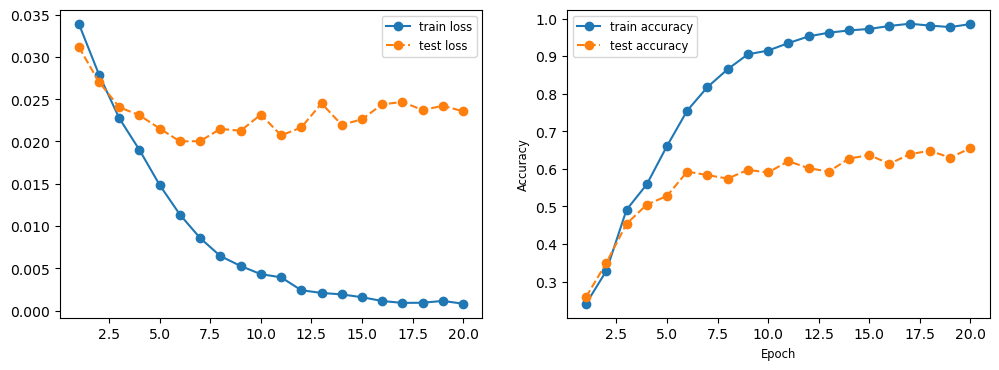

In [54]:

x_arr = np.arange(len(hist[0])) + 1
fig = plt.figure(figsize = (12,4))
ax = fig.add_subplot(121)
ax.plot(x_arr, hist[0], '-o', label='train loss')
ax.plot(x_arr, hist[1], '--o', label='test loss')
ax.legend(fontsize = 'small')
ax = fig.add_subplot(122)
ax.plot(x_arr, hist[2], '-o', label='train accuracy')
ax.plot(x_arr, hist[3], '--o', label='test accuracy')
ax.legend(fontsize = 'small')
ax.set_xlabel('Epoch', fontsize = 'small')
ax.set_ylabel('Accuracy', fontsize = 'small')
plt.show()


In [55]:
'''epochs = 100
for epoch in range(epochs):
    for (labels, features) in enumerate(dataloader):
        optimizer.zero_grad()
        print(features[0].shape)
        # 前向传播
        features = features[0].unsqueeze(1)
        outputs = model(features)
        print(features[0])
        # 计算损失
        #labels = labels.squeeze()  # 去除不必要的维度
        loss = criterion(outputs, labels)
        
        # 反向传播和优化
        loss.backward()
        optimizer.step()
        
        print('Epoch: {} \tLoss: {:.6f}'.format(epoch, loss.item()))
        print(outputs)'''

"epochs = 100\nfor epoch in range(epochs):\n    for (labels, features) in enumerate(dataloader):\n        optimizer.zero_grad()\n        print(features[0].shape)\n        # 前向传播\n        features = features[0].unsqueeze(1)\n        outputs = model(features)\n        print(features[0])\n        # 计算损失\n        #labels = labels.squeeze()  # 去除不必要的维度\n        loss = criterion(outputs, labels)\n        \n        # 反向传播和优化\n        loss.backward()\n        optimizer.step()\n        \n        print('Epoch: {} \tLoss: {:.6f}'.format(epoch, loss.item()))\n        print(outputs)"